In [59]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [60]:
# Imports
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [61]:
def TS_dynamics(t,y,alpha_1,alpha_2,beta,gamma):    
    #y[0] = u
    #y[1] = v
    
    dydt = np.zeros(2)
    
    dydt[0] = alpha_1/(1+y[1]**beta) - y[0]
    dydt[1] = alpha_2/(1+y[0]**gamma) - y[1]
    
    return dydt

In [87]:
def plot_dynamics(t, alpha_1, alpha_2, beta, gamma, tspan, y0, row, col):
    ode_sol_list = []
    for i in range(len(y0)):
        ode_sol = solve_ivp(lambda t,y:TS_dynamics(t,y,alpha_1,alpha_2,beta,gamma),tspan,y0[i],t_eval=t)
        ode_sol_list.append(ode_sol)
        # Plot dynamics
        axs[row, col].plot(ode_sol_list[i].y[0],ode_sol.y[1],'m',linewidth = 0.5)
        axs[row, col].plot(ode_sol_list[i].y[0][0],ode_sol.y[1][0],'m.', markersize = 4) #starting point

In [92]:
def plot_nullclines(alpha_1, alpha_2, beta, gamma, x, row, col):
    u = alpha_1/(1+x**beta)
    v = alpha_2/(1+x**gamma)
    axs[row,col].plot(u,x,'r', label = 'du/dt = 0', alpha=0.5)
    axs[row,col].plot(x,v,'b', label = 'dv/dt = 0', alpha=0.5)
    axs[row,col].set_xlabel('u')
    axs[row,col].set_ylabel('v')
    axs[row,col].legend();

C:\Users\gavin\AppData\Local\Temp\ipykernel_10520\1800717880.py:2: RuntimeWarning: overflow encountered in power
  u = alpha_1/(1+x**beta)
C:\Users\gavin\AppData\Local\Temp\ipykernel_10520\1800717880.py:3: RuntimeWarning: overflow encountered in power
  v = alpha_2/(1+x**gamma)
C:\Users\gavin\AppData\Local\Temp\ipykernel_10520\793664669.py:8: RuntimeWarning: overflow encountered in scalar power
  dydt[1] = alpha_2/(1+y[0]**gamma) - y[1]
C:\Users\gavin\AppData\Local\Temp\ipykernel_10520\793664669.py:7: RuntimeWarning: overflow encountered in scalar power
  dydt[0] = alpha_1/(1+y[1]**beta) - y[0]


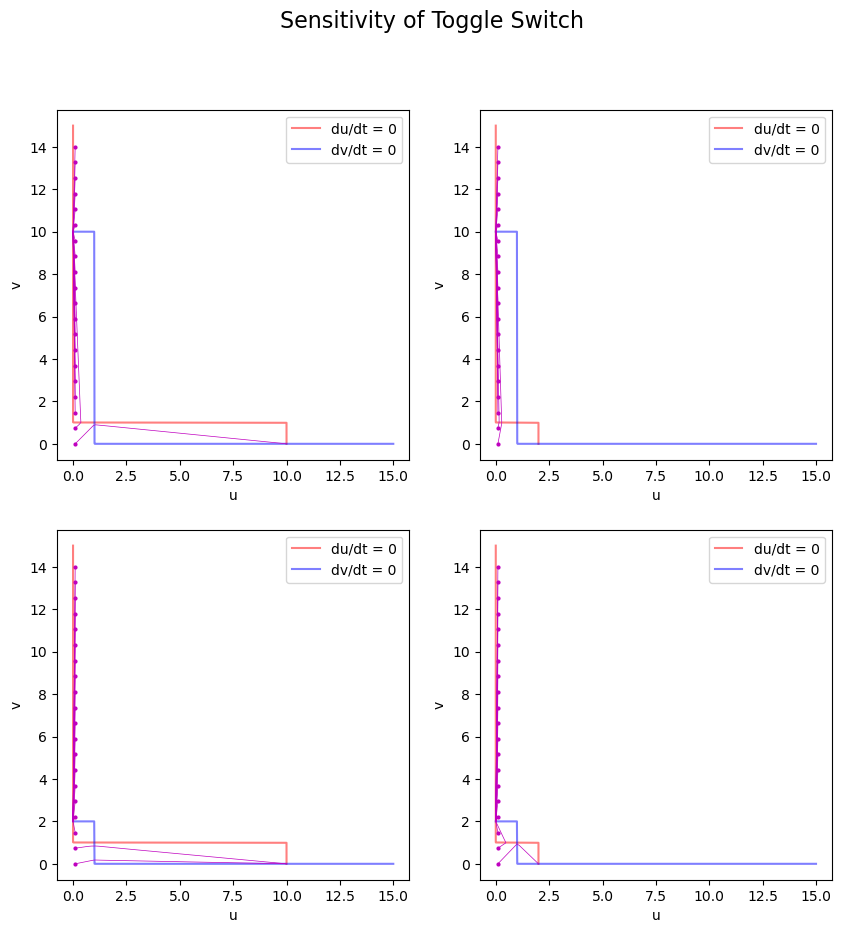

In [97]:
#Parameters
beta = 1000
gamma = 1000
u0 = 0.1
x = np.linspace(0,x_max,1000)

[fig,axs] = plt.subplots(2,2,figsize=[10,10])

# Simulate dynamics
# Initial Conditions
v0 = np.linspace(0,14,20)
y0 = []
initial_point = []
for i in v0:
    initial_point = [u0,i]
    if initial_point[0] != initial_point[1]:
        y0.append(initial_point)

# time span
t = np.linspace(0,10,1000)
tspan = [t[0],t[-1]]

#Plot dynamics with equal alpha_1 & alpha_2
alpha_1 = 10
alpha_2 = alpha_1
plot_nullclines(alpha_1, alpha_2, beta, gamma, x, 0, 0)
plot_dynamics(t, alpha_1, alpha_2, beta, gamma, tspan, y0, 0, 0)

fig.suptitle('Sensitivity of Toggle Switch', fontsize=16)


alpha_1 = 2
alpha_2 = 10
plot_nullclines(alpha_1, alpha_2, beta, gamma, x, 0, 1)
plot_dynamics(t, alpha_1, alpha_2, beta, gamma, tspan, y0, 0, 1)

alpha_1 = 10
alpha_2 = 2
plot_nullclines(alpha_1, alpha_2, beta, gamma, x, 1, 0)
plot_dynamics(t, alpha_1, alpha_2, beta, gamma, tspan, y0, 1, 0)

alpha_1 = 2
alpha_2 = 2
plot_nullclines(alpha_1, alpha_2, beta, gamma, x, 1, 1)
plot_dynamics(t, alpha_1, alpha_2, beta, gamma, tspan, y0, 1, 1)